## `Loading all required libraries:`

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from datetime import datetime
from datetime import timedelta
from pandas import DataFrame
from pandas import to_datetime
from matplotlib import pyplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.tsa.arima_model import ARIMA  
from pandas.plotting import register_matplotlib_converters  
register_matplotlib_converters()
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt



# `Loading Data`

In [6]:
# Load data
eth = pd.read_csv('/Users/ayubpathan/Desktop/ironhack/final project/archive/coin_Ethereum.csv')

In [7]:
eth.head()

SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07

In [8]:
eth['Date'] = pd.to_datetime(eth['Date']).dt.date

In [9]:
eth['Close'].max()

4168.70104865

# `Data Check`

In [10]:
eth.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

# `Plotting graphs:`
- To check how is signal of time series over the years
- To check how marketcap is changing over time
- To check how 

In [11]:
eth.head().append(eth.tail())

SNo      Name Symbol        Date         High          Low  \
0        1  Ethereum    ETH  2015-08-08     2.798810     0.714725   
1        2  Ethereum    ETH  2015-08-09     0.879810     0.629191   
2        3  Ethereum    ETH  2015-08-10     0.729854     0.636546   
3        4  Ethereum    ETH  2015-08-11     1.131410     0.663235   
4        5  Ethereum    ETH  2015-08-12     1.289940     0.883608   
2155  2156  Ethereum    ETH  2021-07-02  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03  2237.567155  2117.590013   
2157  2158  Ethereum    ETH  2021-07-04  2384.286857  2190.837703   
2158  2159  Ethereum    ETH  2021-07-05  2321.922836  2163.041394   
2159  2160  Ethereum    ETH  2021-07-06  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  
0        2.793760     0.753325  6.741880e+05  4.548689e+07  
1        0.706136     0.701897  5.321700e+05  4.239957e+07  
2        0.713989     0.708448  4.052830e+05  4.281836e+07  
3        0.708087     1.067860  1.463100e+06  6.456929e+07  
4        1.058750     1.217440  2.150620e+06  7.364501e+07  
2155  2109.892677  2150.040364  3.179621e+10  2.505527e+11  
2156  2150.835025  2226.114282  1.743336e+10  2.594475e+11  
2157  2226.550382  2321.724112  1.878711e+10  2.706217e+11  
2158  2321.922836  2198.582464  2.010379e+10  2.562978e+11  
2159  2197.919385  2324.679449  2.089186e+10  2.710286e+11

- Above summary clearly shows us that we have `daily data` from each month between 
  the period of 2013-12-16 and 2021-07-06

# `Plotting signals over years`

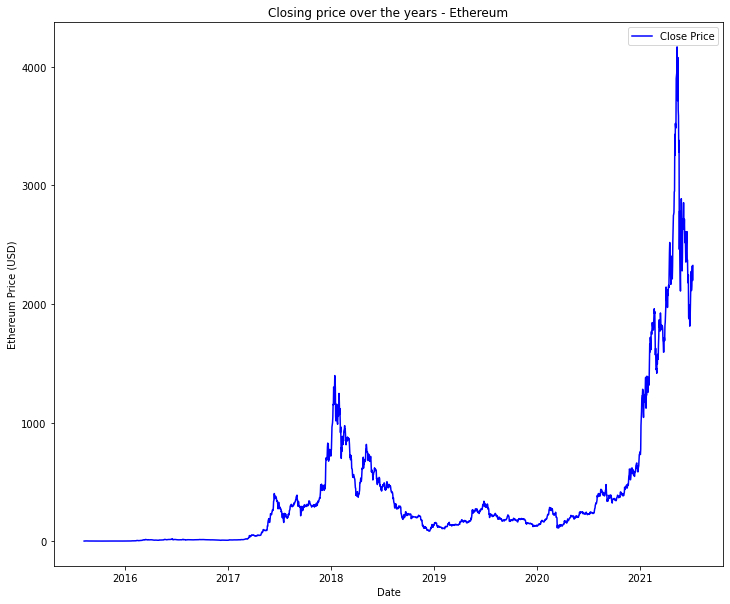

In [12]:
fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax = plt.subplot(1,1,1)
ax = sns.lineplot(data=eth, x='Date', y='Close', color='blue', label='Close Price')
plt.title ('Closing price over the years - Ethereum')
plt.ylabel('Ethereum Price (USD)')
plt.legend(loc='best')

Text(0.5, 1.0, 'Market Capitalization of Ethereum')

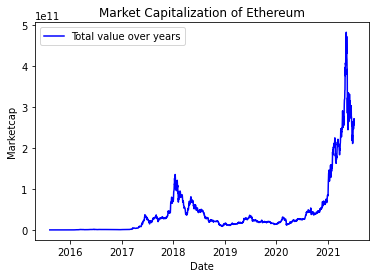

In [15]:
ax1 = plt.subplot(1,1,1)
#ax = sns.distplot(eth['Marketcap'])
ax1 = sns.lineplot(data=eth, x='Date', y='Marketcap', color='blue', label='Total value over years')

ax1.patch.set_alpha(1.0)
plt.title ('Market Capitalization of Ethereum')


Text(0.5, 1.0, 'Coin circulation in the market')

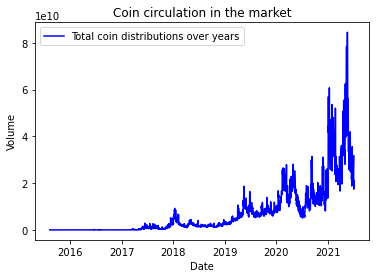

In [17]:
ax2 = plt.subplot(1,1,1)
#ax = sns.distplot(eth['Marketcap'])
ax2 = sns.lineplot(data=eth, x='Date', y='Volume', color='blue', label='Total coin distributions over years')

ax2.patch.set_alpha(1.0)
plt.title ('Coin circulation in the market')


In [ ]:
# Taking log of Close column for future use:

Text(0, 0.5, 'Ethereum Price')

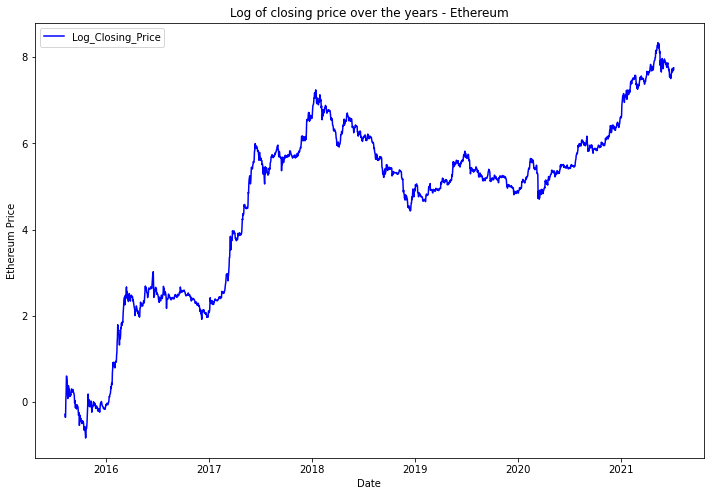

In [26]:
# Take the log and plot again to see clear spikes

fig = plt.figure(figsize=(12,8))

eth['Close_log'] = np.log(eth['Close'])

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(1,1,1)
ax1 = sns.lineplot(data=eth, x='Date', y='Close_log', color='blue', label='Log_Closing_Price')
plt.title ('Log of closing price over the years - Ethereum')
plt.ylabel('Ethereum Price')

# `Analysing data with FB PROPHET`

In [204]:
# defining new dataframe with new columns; date as ds and open as y for Prophet prediction!

In [28]:
eth_df = eth[['Date', 'Open']]
new_columns = {'Date':'ds', 'Open':'y'}
eth_df.rename(columns = new_columns, inplace=True)

In [29]:
eth_df.head()

ds         y
0  2015-08-08  2.793760
1  2015-08-09  0.706136
2  2015-08-10  0.713989
3  2015-08-11  0.708087
4  2015-08-12  1.058750

- `Initiate model`

In [30]:
prophet = Prophet(daily_seasonality=True,seasonality_mode='multiplicative') 
#multiplicative mode is used because we have non-seasonal & non-stationary data

- `Fit model`

In [ ]:
prophet.fit(eth_df)

- `Make future prediction for 365 days`

In [761]:
future = prophet.make_future_dataframe(periods = 365)
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
forecast[forecast['ds'] == next_day]['yhat'].item()

1692.0079654609956

In [765]:
forecast[forecast['ds']=='2021-07-30']
# today's rate 2310 $ 
# yhat shows 2576
# 12% difference in prediction, its huge!!!!

ds       trend   yhat_lower   yhat_upper  trend_lower  \
2183 2021-07-30  395.287634  1592.655407  1795.885489   394.803175   

      trend_upper     daily  daily_lower  daily_upper  multiplicative_terms  \
2183   396.062042  4.122446     4.122446     4.122446              3.280447   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
2183  ...  0.002909      0.002909      0.002909 -0.844907     -0.844907   

      yearly_upper  additive_terms  additive_terms_lower  \
2183     -0.844907             0.0                   0.0   

      additive_terms_upper         yhat  
2183                   0.0  1692.007965  

[1 rows x 22 columns]

# `Plot forecast for prophet`

In [36]:
plot_plotly(prophet, forecast)

In [37]:
plot_components_plotly(prophet, forecast)

# `Chekc MAPE for prophet model:`

In [38]:
# cycle of regularity/irregularity in train set
# very important to check MAPE first by means of cross validation method from Prophet:

from fbprophet.diagnostics import cross_validation

def mean_absolute_percentage_error(y_true, y_pred):
    """
    This function gives us mape by using 
    y_true - real values
    y_pred - predicted values
    
    by defination mape is
    mape = abs((y_true - y_pred)/(y_true))

    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred)/(y_true)))

In [47]:
#model_1.fit(eth_df)
future = prophet.make_future_dataframe(freq ='D', periods = 365)
forecast = prophet.predict(future)                   
cv_result = cross_validation(prophet,initial='1800 days', period='5 days', horizon='30 days')
#cv_result = cross_validation(model_1,initial='1400 days', period='30 days', horizon='365 days')
mape = mean_absolute_percentage_error(cv_result.y, cv_result.yhat) # y=true value , y_hat = forecast value

INFO:fbprophet:Making 66 forecasts with cutoffs between 2020-07-16 00:00:00 and 2021-06-06 00:00:00


  0%|          | 0/66 [00:00<?, ?it/s]

In [48]:
mape

0.281468745195826

- This value of mape is really huge and hence it is not a best prediction as we have already seen that there is a 
big difference between predicted and today's price (2021-07-30)

# `Plot to see how mape for prophet changes`

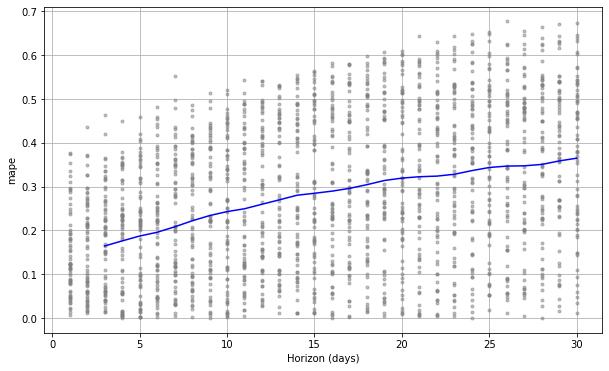

In [49]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_result, metric='mape')

# `Signal Staionary???`

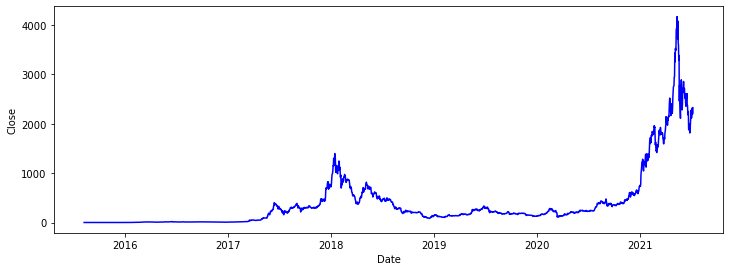

In [20]:
# is signal stationary? 
fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=eth, x='Date', y='Close', color='blue')
ax1_title = ('Close price over the years')


In [21]:
eth.head()

SNo      Name Symbol        Date      High       Low      Open     Close  \
0    1  Ethereum    ETH  2015-08-08  2.798810  0.714725  2.793760  0.753325   
1    2  Ethereum    ETH  2015-08-09  0.879810  0.629191  0.706136  0.701897   
2    3  Ethereum    ETH  2015-08-10  0.729854  0.636546  0.713989  0.708448   
3    4  Ethereum    ETH  2015-08-11  1.131410  0.663235  0.708087  1.067860   
4    5  Ethereum    ETH  2015-08-12  1.289940  0.883608  1.058750  1.217440   

      Volume     Marketcap  
0   674188.0  4.548689e+07  
1   532170.0  4.239957e+07  
2   405283.0  4.281836e+07  
3  1463100.0  6.456929e+07  
4  2150620.0  7.364501e+07

In [22]:
# Decided to take data from row index 500

In [23]:
eth.head()
eth_coin = eth.iloc[500:,:]
eth_coin.head()

SNo      Name Symbol        Date     High      Low     Open    Close  \
500  501  Ethereum    ETH  2016-12-20  7.74590  7.57160  7.63368  7.66004   
501  502  Ethereum    ETH  2016-12-21  7.94360  7.66286  7.66366  7.91440   
502  503  Ethereum    ETH  2016-12-22  7.90586  7.50171  7.89904  7.58500   
503  504  Ethereum    ETH  2016-12-23  7.69174  7.16114  7.57695  7.16615   
504  505  Ethereum    ETH  2016-12-24  7.40543  7.15242  7.15242  7.26577   

         Volume     Marketcap  
500   6313550.0  6.673100e+08  
501   9393550.0  6.897190e+08  
502  16376700.0  6.612479e+08  
503  19613100.0  6.249565e+08  
504   7626020.0  6.338719e+08

It can be clearly seen from the plot thatthe `signal is not stationary`. However, we have to make sure by means of statistical values of p-value by means of using rolling means and rolling std

# `Plotting rolling mean and rolling std dev with data`

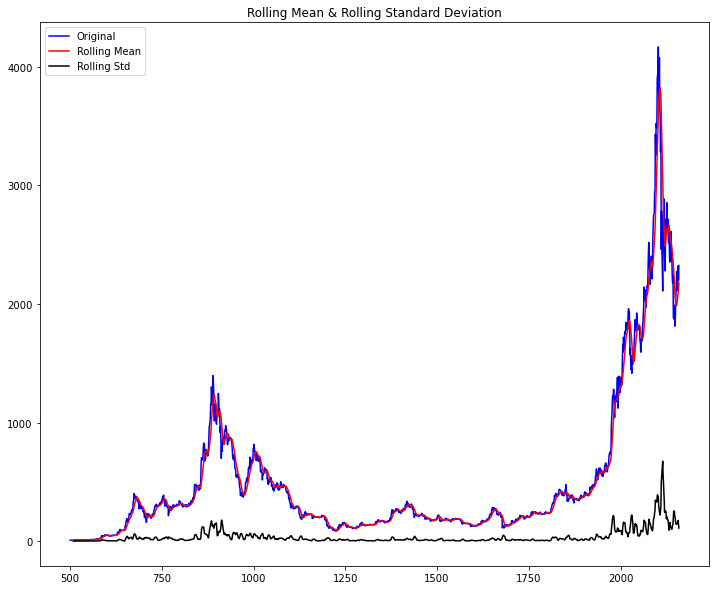

In [24]:
fig = plt.figure(figsize=(12,10))
rolling_mean = eth_coin.Close.rolling(window=10).mean()
rolling_std = eth_coin.Close.rolling(window = 10).std() 
plt.plot(eth_coin.Close, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend() 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.show()

From the plot above, we can clearly see rolling mean & rolling standard deviation increase with time. 
Therefore, we can conclude that the time series is not stationary.

# `Making time series stationary`

To make time series stationary, we can use `Augmented Dickey-Fuller unit root test to check p-value`

In [25]:
# importing library:
from statsmodels.tsa.stattools import adfuller

# define function to get stationary timeseries:
def get_stationary(ts):   #ts=timeseries
    
    """
    This function gives rolling means and rolling std dev by using time series 
    from statsmodels and uses adfuller function to print all the required statistics
    """
      
    # rolling statistics
    fig = plt.figure(figsize=(12,10))
    rolling_mean = ts.rolling(window=50).mean()  
    rolling_std = ts.rolling(window=50).std()  
      
    # rolling statistics plot  
    original = plt.plot(ts, color='blue', label='Original')  
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')  
    std = plt.plot(rolling_std, color='black', label='Rolling Std')  
    plt.legend(loc='best')  
    plt.title('Rolling Mean & Standard Deviation')  
    plt.show(block=False)  
        
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(ts, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4],index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [26]:
# check etch coin close if it shows stationary signal

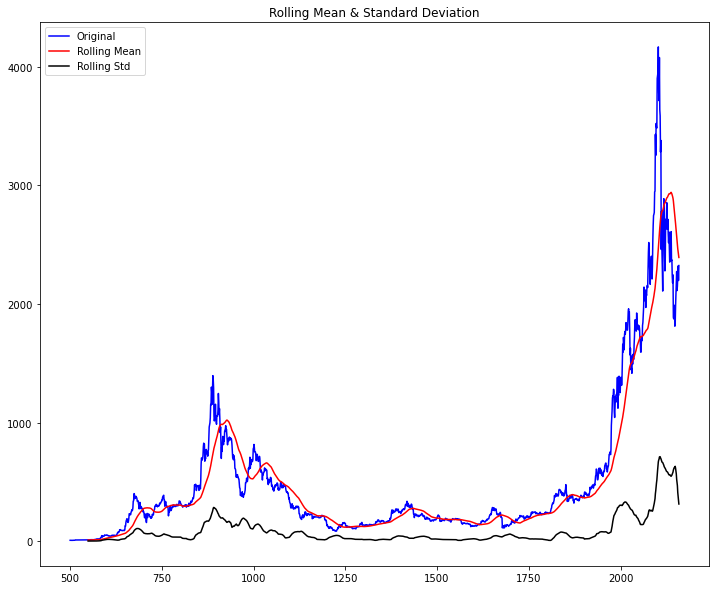

Results of Dickey-Fuller Test:
Test Statistic                   -0.288752
p-value                           0.927082
Lags Used                        24.000000
Number of Observations Used    1635.000000
Critical Value (1%)              -3.434356
Critical Value (5%)              -2.863309
Critical Value (10%)             -2.567712
dtype: float64


In [27]:
get_stationary(eth_coin.Close)

From above test statistics, crticial values & `p-value` is `0.927` which is much higher than threshold `0.05` 
and hence we cannot reject H0 and concludes that time series is not stationary

### `Next step is to use log to avoid fluctuations in the signals and plot it`

In [35]:
eth_coin = eth.iloc[500:, 3:]
eth_coin

Date         High          Low         Open        Close  \
500   2016-12-20     7.745900     7.571600     7.633680     7.660040   
501   2016-12-21     7.943600     7.662860     7.663660     7.914400   
502   2016-12-22     7.905860     7.501710     7.899040     7.585000   
503   2016-12-23     7.691740     7.161140     7.576950     7.166150   
504   2016-12-24     7.405430     7.152420     7.152420     7.265770   
...          ...          ...          ...          ...          ...   
2155  2021-07-02  2155.596496  2021.824808  2109.892677  2150.040364   
2156  2021-07-03  2237.567155  2117.590013  2150.835025  2226.114282   
2157  2021-07-04  2384.286857  2190.837703  2226.550382  2321.724112   
2158  2021-07-05  2321.922836  2163.041394  2321.922836  2198.582464   
2159  2021-07-06  2346.294874  2197.919385  2197.919385  2324.679449   

            Volume     Marketcap  
500   6.313550e+06  6.673100e+08  
501   9.393550e+06  6.897190e+08  
502   1.637670e+07  6.612479e+08  
503   1.961310e+07  6.249565e+08  
504   7.626020e+06  6.338719e+08  
...            ...           ...  
2155  3.179621e+10  2.505527e+11  
2156  1.743336e+10  2.594475e+11  
2157  1.878711e+10  2.706217e+11  
2158  2.010379e+10  2.562978e+11  
2159  2.089186e+10  2.710286e+11  

[1660 rows x 7 columns]

In [41]:
log_eth = np.log(eth_coin['Close'])

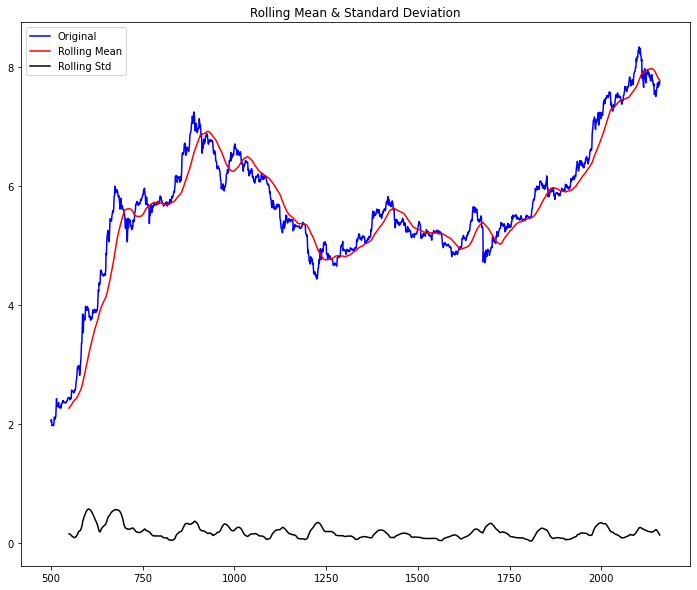

Results of Dickey-Fuller Test:
Test Statistic                   -2.497207
p-value                           0.116155
Lags Used                        10.000000
Number of Observations Used    1649.000000
Critical Value (1%)              -3.434322
Critical Value (5%)              -2.863294
Critical Value (10%)             -2.567704
dtype: float64


In [42]:
# Now plot rolling mean and rolling std for this logarithmic plot
get_stationary(log_eth)

From above test statistics, crticial values & `p-value` is `0.11` which is still higher than threshold `0.05` 
and hence we cannot reject H0 and still time series is not stationary

### Let's take log difference of 1 for log eth

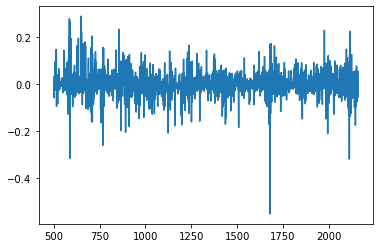

In [43]:
log_eth_diff = log_eth.diff()
plt.plot(log_eth_diff)

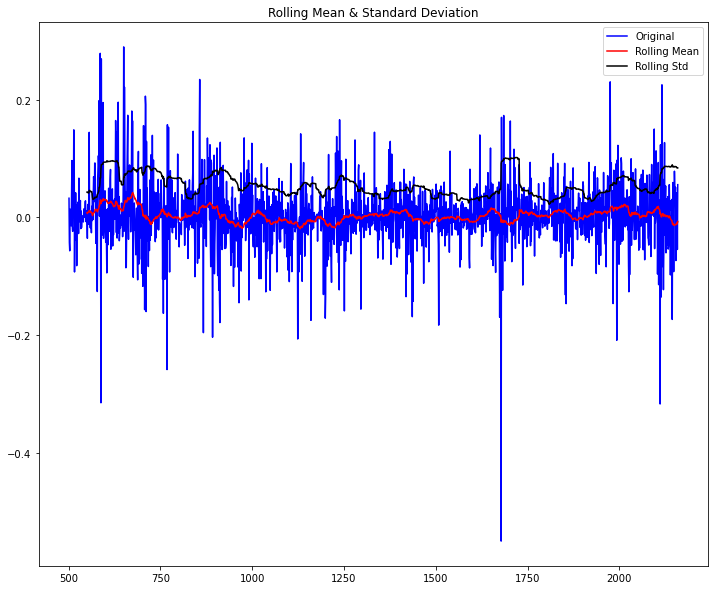

Results of Dickey-Fuller Test:
Test Statistic                -1.167840e+01
p-value                        1.765320e-21
Lags Used                      9.000000e+00
Number of Observations Used    1.649000e+03
Critical Value (1%)           -3.434322e+00
Critical Value (5%)           -2.863294e+00
Critical Value (10%)          -2.567704e+00
dtype: float64


In [44]:
# Plot rolling mean and rolling std for this logarithmic plot
log_eth_diff.dropna(inplace=True) # because first value is NaN
get_stationary(log_eth_diff) 

## From above test statistics, crticial values & `p-value` is `1.76 x e-21` which is way smaller than the 5% critical values and hence we reject null hypothesis (H0) and conclude that with 95% confidence this is a stationary time series.


In [440]:
# eth_coin['Close'] = eth_coin.Close
eth_coin['log_close'] = eth_coin['Close'].apply(np.log)
#eth_coin.drop(columns='Close_log',inplace=True)
#eth_coin.head()
#eth_coin[['Date','log_close']].head()
eth_coin['log_close_diff'] = eth_coin[['log_close']].diff()
eth_coin.head()

#log_eth2 = np.log(eth_coin.Close.values)
#plt.plot(log_eth2)
#plt.plot(log_eth)

SNo      Name Symbol        Date     High      Low     Open    Close  \
500  501  Ethereum    ETH  2016-12-20  7.74590  7.57160  7.63368  7.66004   
501  502  Ethereum    ETH  2016-12-21  7.94360  7.66286  7.66366  7.91440   
502  503  Ethereum    ETH  2016-12-22  7.90586  7.50171  7.89904  7.58500   
503  504  Ethereum    ETH  2016-12-23  7.69174  7.16114  7.57695  7.16615   
504  505  Ethereum    ETH  2016-12-24  7.40543  7.15242  7.15242  7.26577   

         Volume     Marketcap  log_close  log_close_diff  
500   6313550.0  6.673100e+08   2.036017             NaN  
501   9393550.0  6.897190e+08   2.068684        0.032667  
502  16376700.0  6.612479e+08   2.026173       -0.042511  
503  19613100.0  6.249565e+08   1.969369       -0.056804  
504   7626020.0  6.338719e+08   1.983174        0.013806

<AxesSubplot:xlabel='Date'>

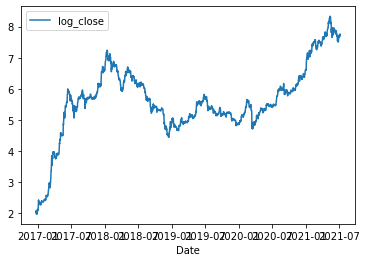

In [441]:
eth_coin.plot(x='Date',y='log_close')

In [449]:
data = eth_coin[['Date','Close','log_close','log_close_diff']]
data.index = pd.to_datetime(data.Date)
data.drop(columns = 'Date',inplace= True)
data.head()

Close  log_close  log_close_diff
Date                                          
2016-12-20  7.66004   2.036017             NaN
2016-12-21  7.91440   2.068684        0.032667
2016-12-22  7.58500   2.026173       -0.042511
2016-12-23  7.16615   1.969369       -0.056804
2016-12-24  7.26577   1.983174        0.013806

In [770]:
# install pyramid to use for auto arima

In [450]:
#!pip install pyramid

     |████████████████████████████████| 246 kB 4.1 MB/s eta 0:00:01     |████████████████████████        | 184 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 20.7 MB/s eta 0:00:01


In [455]:
#!pip install pmdarima

In [459]:
from pmdarima import auto_arima

stepwise_model = auto_arima(data['log_close'],start_p=0,start_q=0,
                            max_p = 1, max_q=2,
                            d=1,
                            seasonal=False,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.aic())

-4765.140114751428


In [460]:
stepwise_model

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

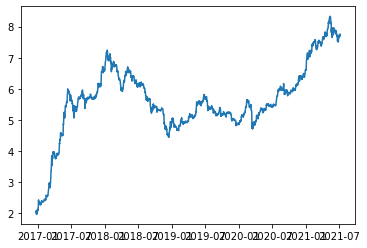

In [462]:
plt.plot(data.log_close)

In [464]:
#data.head()
train = data.loc['2016-12-20':'2020-12-31']
test  = data.loc['2020-12-31':]

In [466]:
train

Close  log_close  log_close_diff
Date                                             
2016-12-20    7.660040   2.036017             NaN
2016-12-21    7.914400   2.068684        0.032667
2016-12-22    7.585000   2.026173       -0.042511
2016-12-23    7.166150   1.969369       -0.056804
2016-12-24    7.265770   1.983174        0.013806
...                ...        ...             ...
2020-12-27  682.642359   6.525971        0.071031
2020-12-28  730.397365   6.593589        0.067618
2020-12-29  731.520119   6.595125        0.001536
2020-12-30  751.618972   6.622230        0.027105
2020-12-31  737.803398   6.603677       -0.018552

[1473 rows x 3 columns]

In [467]:
stepwise_model.fit(train.log_close)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [468]:
test.shape

(188, 3)

In [469]:
forecast_test = stepwise_model.predict(n_periods=188)
print(forecast_test)

[6.6122171  6.61884589 6.62520175 6.63130582 6.6371776  6.64283508
 6.64829486 6.65357227 6.65868142 6.66363535 6.66844608 6.67312471
 6.67768146 6.68212579 6.68646639 6.6907113  6.69486794 6.69894314
 6.70294321 6.70687397 6.71074079 6.71454863 6.71830204 6.72200525
 6.72566215 6.72927632 6.73285107 6.73638946 6.7398943  6.7433682
 6.74681354 6.75023254 6.75362725 6.75699953 6.76035114 6.76368367
 6.76699859 6.77029728 6.773581   6.77685089 6.78010803 6.78335341
 6.78658794 6.78981247 6.79302775 6.79623452 6.79943343 6.80262509
 6.80581006 6.80898886 6.81216197 6.81532983 6.81849284 6.82165138
 6.8248058  6.82795641 6.83110352 6.83424738 6.83738826 6.84052639
 6.84366197 6.84679521 6.84992629 6.85305537 6.85618261 6.85930815
 6.86243212 6.86555465 6.86867584 6.8717958  6.87491463 6.87803241
 6.88114923 6.88426515 6.88738026 6.8904946  6.89360824 6.89672124
 6.89983365 6.9029455  6.90605685 6.90916773 6.91227817 6.91538822
 6.91849791 6.92160725 6.92471628 6.92782503 6.93093351 6.93404

In [472]:
forecast_test_df = pd.DataFrame(forecast_test, index=test.index, columns=['Prediction'])
forecast_test_df.head()

Prediction
Date                  
2020-12-31    6.612217
2021-01-01    6.618846
2021-01-02    6.625202
2021-01-03    6.631306
2021-01-04    6.637178

<AxesSubplot:xlabel='Date'>

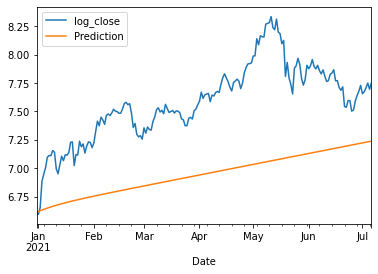

In [476]:
results_test_df = pd.concat([test,forecast_test_df],axis=1)
results_test_df.plot(y=['log_close','Prediction'])

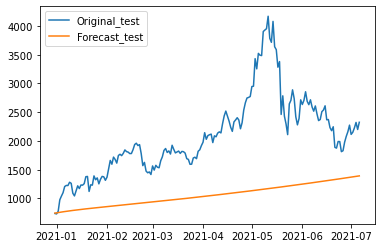

In [480]:
plt.plot(results_test_df.Close, label='Original_test')
plt.plot(np.exp(results_test_df.Prediction), label='Forecast_test')
plt.legend()

In [ ]:
forecast_future = stepwise_model.predict(n_periods=300) # 188 first data belongs to test!
plt


In [473]:
final_arima = ARIMA(eth_coin['log_close'], order=(1, 1, 2)) # using log df instead original
results_f = final_arima.fit()
print(results_f.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_close   No. Observations:                 1659
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2387.571
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 29 Jul 2021   AIC                          -4765.142
Time:                        19:14:38   BIC                          -4738.072
Sample:                             1   HQIC                         -4755.108
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0035      0.002      1.840      0.066      -0.000       0.007
ar.L1.D.log_close     0.9036      0.074     12.292      0.000       0.759       1.048
ma.L1.D.log_close    -0.

In [446]:
results_f.predict()

501     0.003455
502     0.002620
503     0.005857
504     0.004474
505    -0.000028
          ...   
2155    0.008357
2156    0.002576
2157    0.002150
2158    0.003056
2159    0.007681
Length: 1659, dtype: float64

# `ARIMA MODEL:`

# AR+I+MA
## AutoRegressive Integrated Moving Average

- ARIMA can be used to forecast the time series with significant dependence among values.
- ARIMA model is characterized by 3 terms: p, d, q where,
    - p is the order of the AR term
    - q is the order of the MA term
    - d is the number of differencing required to make the time series stationary
  
 Here we even get much lower value for p-value and hence we can consider value for `d-parameter` of ARIMA(p,d,q) as `1`

- So far, d is derived from differencing order by means of log and shift functions

- Let's go for PACF - Partial Auto Correlation Function to get the value of p

# `PACF & ACF`

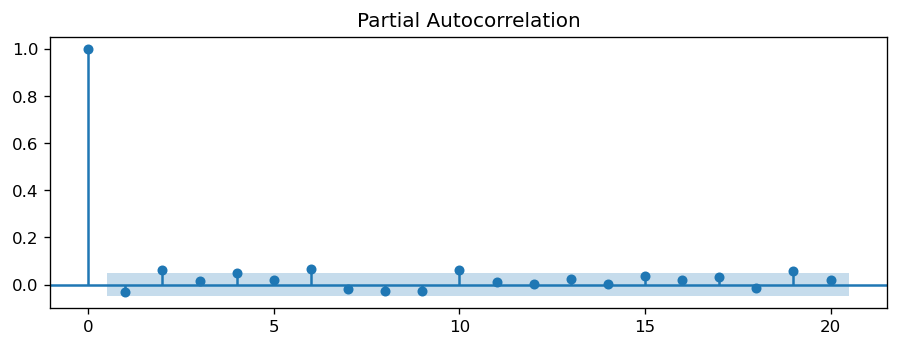

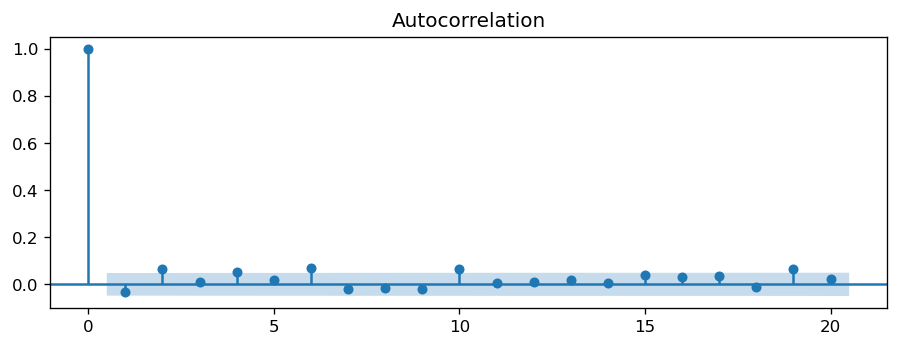

In [625]:
fig = plot_pacf(log_eth_diff, lags=20)
fig = plot_acf(log_eth_diff, lags=20)
fig.show()

From both plots of pacf and acf, we get `p=2` and `q =2` which are `lag=1` with correlation.
However, we cannot use p=q; but for practise purpose, we can fit the model with `various combinations of p & q`.

## Try 1: Let's fit the model with p=q=2 and d=1, we can try various combination of  to know the best least values for AIC AND BIS
- The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q)

# `ARIMA(0,1,0)`


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9015.369
Method:                           css   S.D. of innovations             55.439
Date:                Thu, 29 Jul 2021   AIC                          18034.738
Time:                        21:49:53   BIC                          18045.566
Sample:                             1   HQIC                         18038.751
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3966      1.361      1.026      0.305      -1.271       4.064


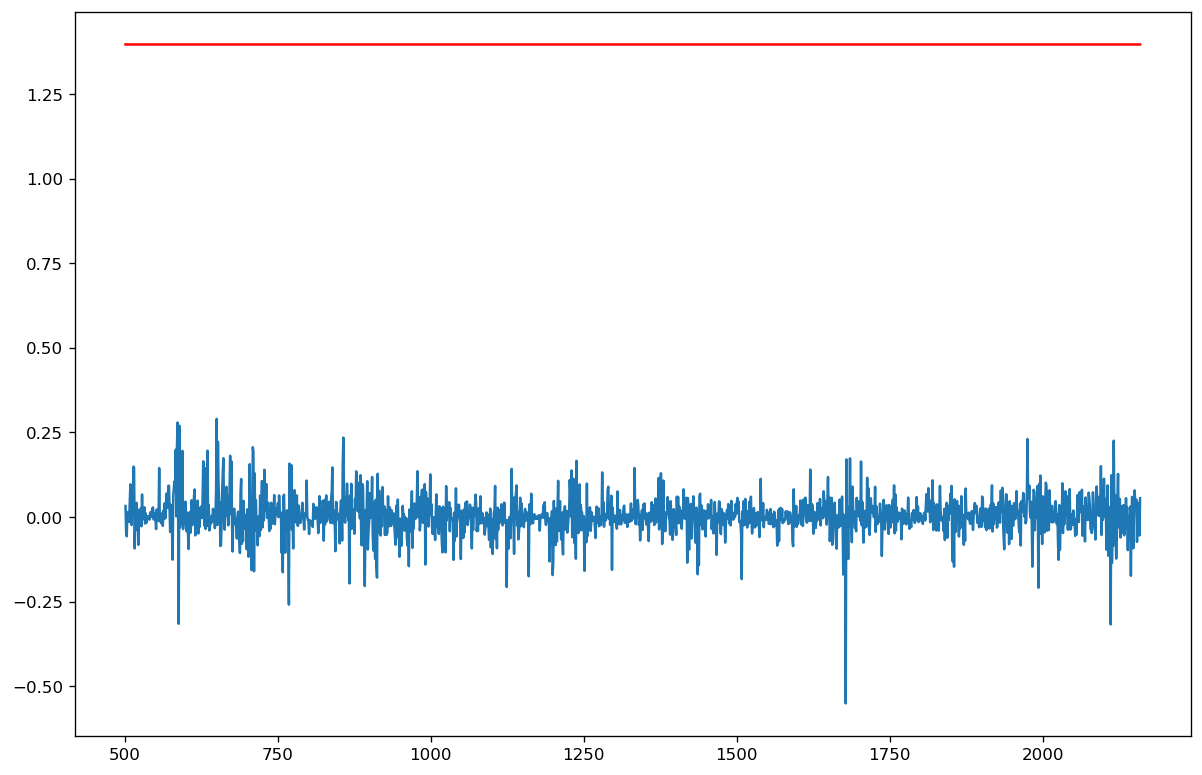

In [602]:
fig = plt.figure(figsize=(12,8))
arima = ARIMA(eth.Close[500:], order=(0, 1, 0))  # arima should be with eth_coin first log signal
results_ar= arima.fit(disp=-1)  
plt.plot(log_eth_diff) #plot first difference of log
plt.plot(results_ar.fittedvalues, color='red')
print(results_ar.summary()) # printing summary of fit parameters

# `ARIMA(0,1,1)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9000.300
Method:                       css-mle   S.D. of innovations             54.937
Date:                Thu, 29 Jul 2021   AIC                          18006.600
Time:                        21:35:24   BIC                          18022.842
Sample:                             1   HQIC                         18012.620
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3886      1.187      1.170      0.242      -0.938       3.715
ma.L1.D.Close    -0.1201      0.022     -5.554      0.000      -0.163      -0.078
                                    Root

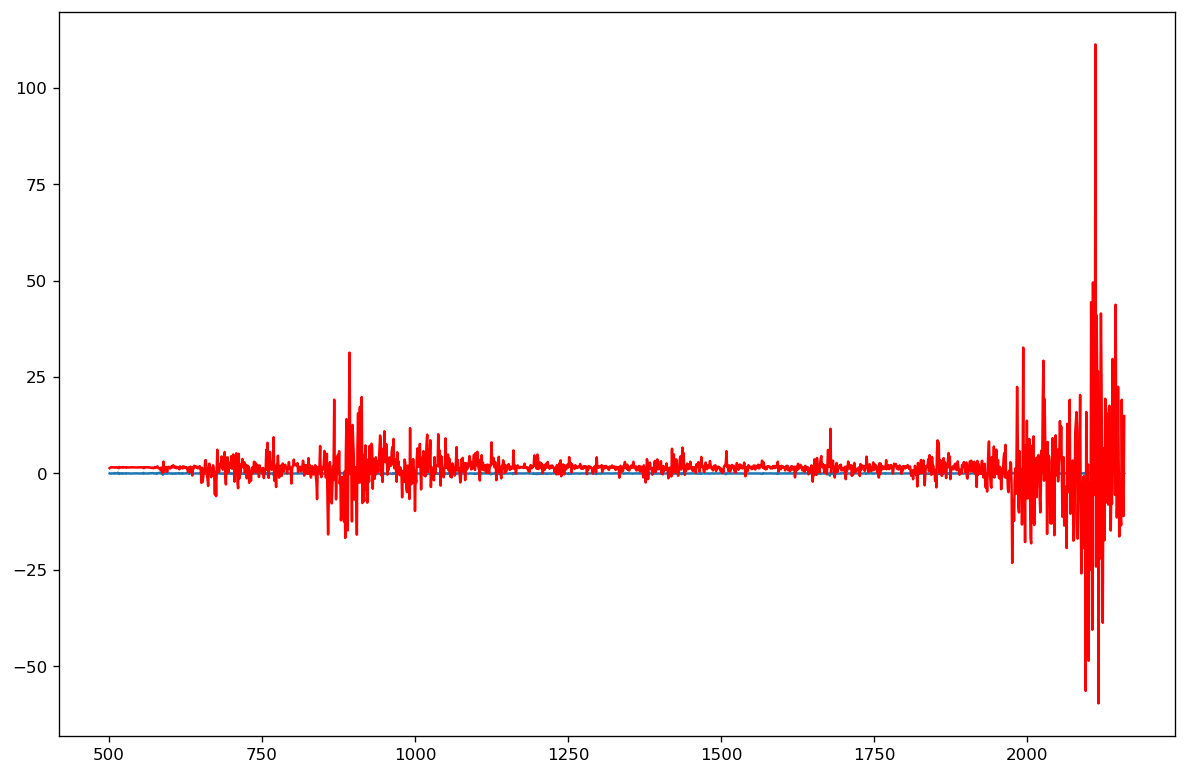

In [587]:
fig = plt.figure(figsize=(12,8))
arima_1 = ARIMA(eth.Close[500:], order=(0, 1, 1)) # using log_eth instead original
results_ar_1 = arima_1.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_1.fittedvalues, color='red')
print(results_ar_1.summary()) # printing summary of fit parameters


# `ARIMA(0,1,2)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -8985.166
Method:                       css-mle   S.D. of innovations             54.438
Date:                Thu, 29 Jul 2021   AIC                          17978.332
Time:                        21:35:33   BIC                          17999.988
Sample:                             1   HQIC                         17986.359
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3865      1.339      1.036      0.300      -1.237       4.010
ma.L1.D.Close    -0.1358      0.024     -5.622      0.000      -0.183      -0.088
ma.L2.D.Close     0.1375      0.026     

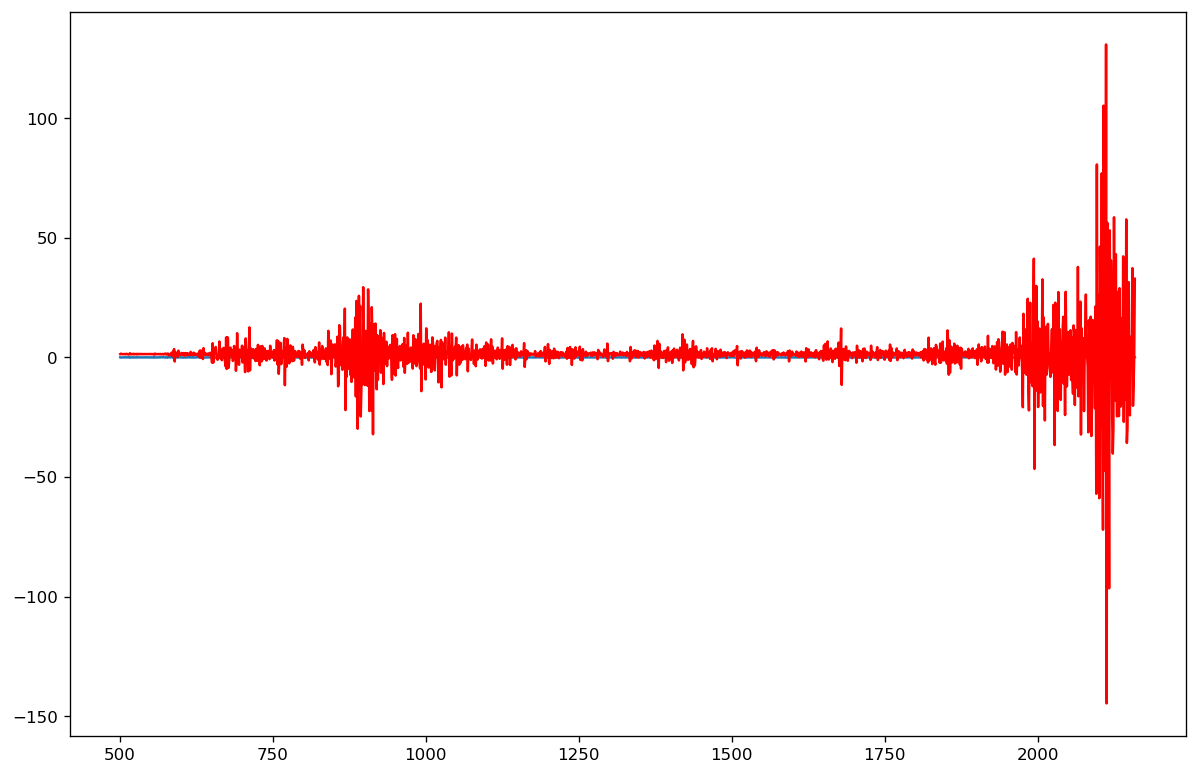

In [588]:
fig = plt.figure(figsize=(12,8))
arima_2 = ARIMA(eth.Close[500:], order=(0, 1, 2)) # using log df instead original
results_ar_2 = arima_2.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_2.fittedvalues, color='red')
print(results_ar_2.summary()) # printing summary of fit parameters


# `ARIMA(1,1,0)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -8996.455
Method:                       css-mle   S.D. of innovations             54.810
Date:                Thu, 29 Jul 2021   AIC                          17998.910
Time:                        21:35:44   BIC                          18015.152
Sample:                             1   HQIC                         18004.931
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3873      1.170      1.186      0.236      -0.906       3.680
ar.L1.D.Close    -0.1503      0.024     -6.186      0.000      -0.198      -0.103
                                    Root

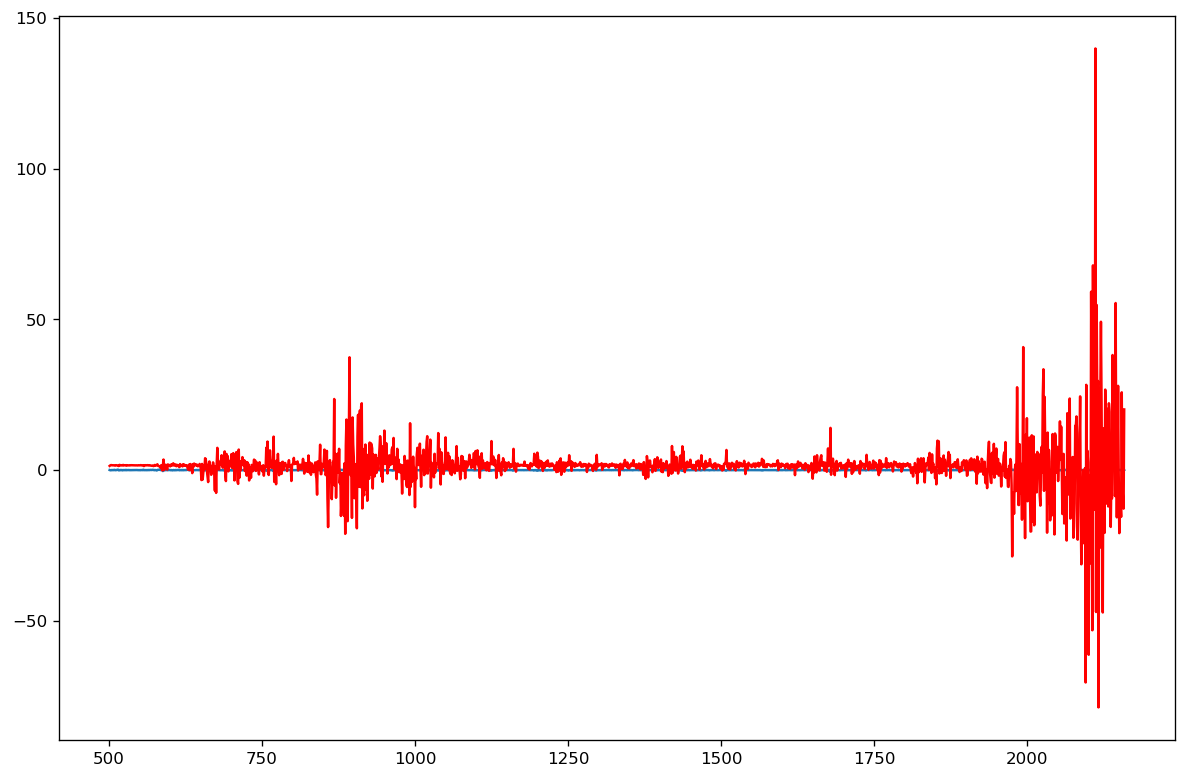

In [589]:
fig = plt.figure(figsize=(12,8))
arima_3 = ARIMA(eth.Close[500:], order=(1, 1, 0)) # using log df instead original
results_ar_3 = arima_3.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_3.fittedvalues, color='red')
print(results_ar_3.summary()) # printing summary of fit parameters


# `ARIMA(1,1,2)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8985.160
Method:                       css-mle   S.D. of innovations             54.438
Date:                Thu, 29 Jul 2021   AIC                          17980.321
Time:                        21:35:52   BIC                          18007.391
Sample:                             1   HQIC                         17990.354
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3867      1.336      1.038      0.299      -1.231       4.004
ar.L1.D.Close    -0.0148      0.141     -0.105      0.916      -0.291       0.262
ma.L1.D.Close    -0.1215      0.139     

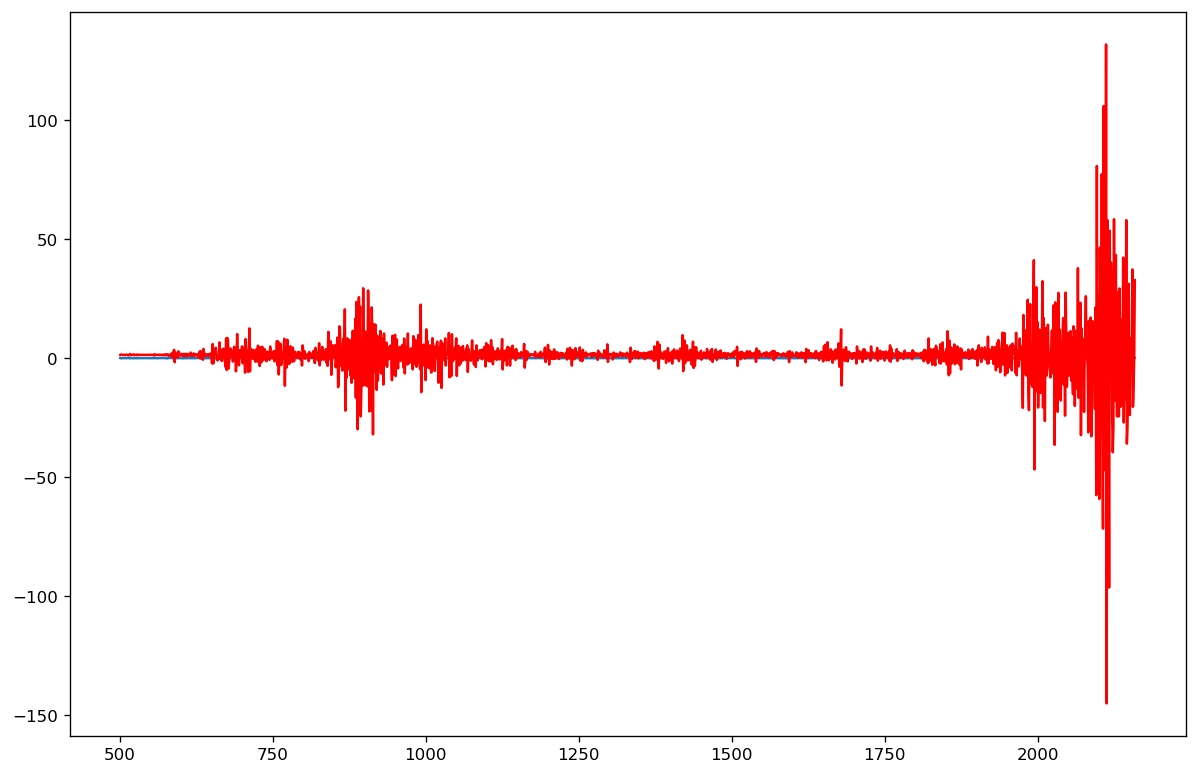

In [590]:
fig = plt.figure(figsize=(12,8))
arima_4 = ARIMA(eth.Close[500:], order=(1, 1, 2)) # using log df instead original
results_ar_4 = arima_4.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_4.fittedvalues, color='red')
print(results_ar_4.summary()) # printing summary of fit parameters


# `ARIMA (2,1,0)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8984.956
Method:                       css-mle   S.D. of innovations             54.431
Date:                Thu, 29 Jul 2021   AIC                          17977.912
Time:                        21:36:00   BIC                          17999.568
Sample:                             1   HQIC                         17985.939
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3867      1.316      1.054      0.292      -1.193       3.966
ar.L1.D.Close    -0.1330      0.024     -5.450      0.000      -0.181      -0.085
ar.L2.D.Close     0.1176      0.024     

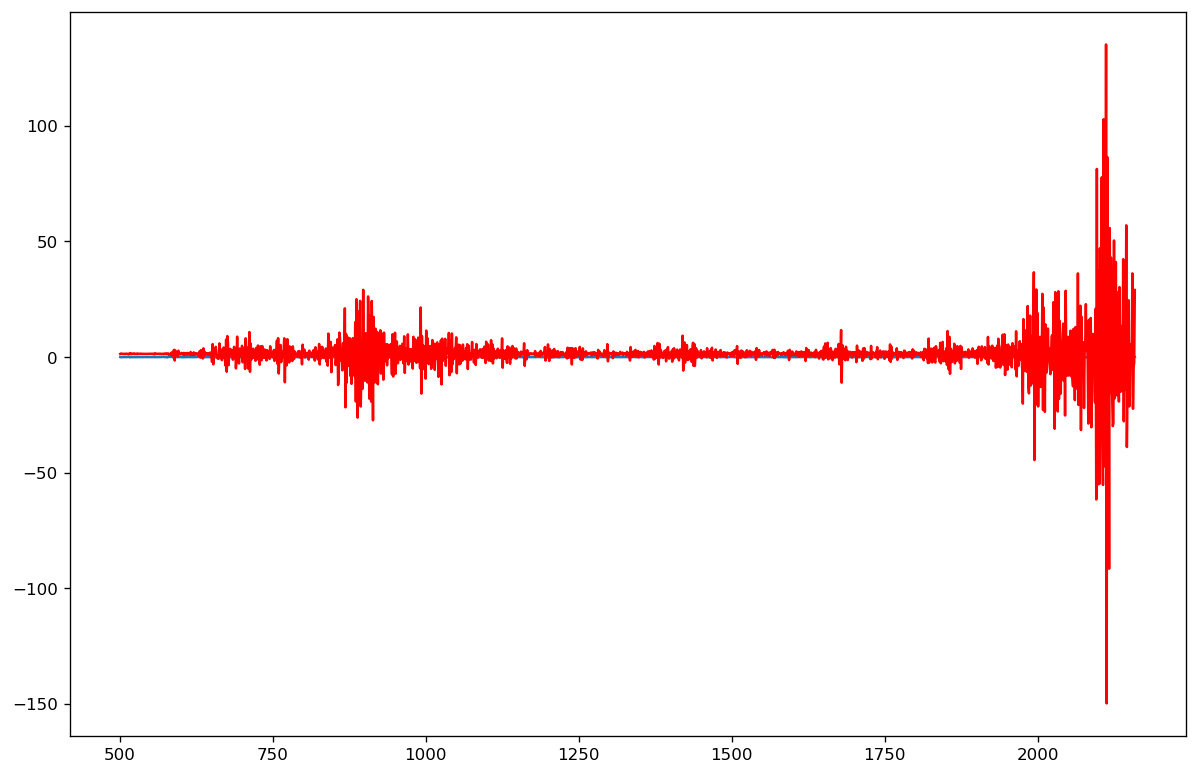

In [591]:
fig = plt.figure(figsize=(12,8))
arima_5 = ARIMA(eth.Close[500:], order=(2, 1, 0)) # using log df instead original
results_ar_5 = arima_5.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_5.fittedvalues, color='red')
print(results_ar_5.summary()) # printing summary of fit parameters


# `ARIMA(2,1,1)`

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8984.649
Method:                       css-mle   S.D. of innovations             54.421
Date:                Thu, 29 Jul 2021   AIC                          17979.298
Time:                        21:36:08   BIC                          18006.368
Sample:                             1   HQIC                         17989.332
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3892      1.364      1.019      0.308      -1.284       4.062
ar.L1.D.Close     0.1105      0.308      0.359      0.719      -0.493       0.714
ar.L2.D.Close     0.1521      0.044     

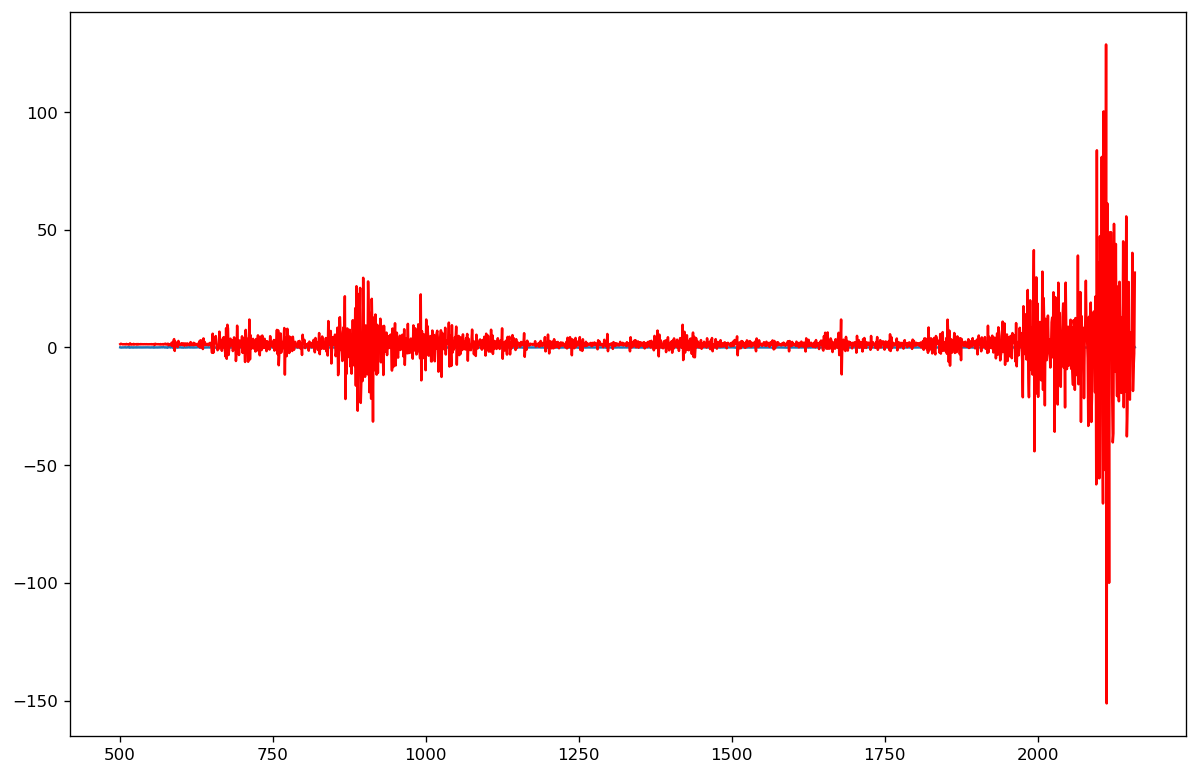

In [592]:
fig = plt.figure(figsize=(12,8))
arima_6 = ARIMA(eth.Close[500:], order=(2, 1, 1)) # using log df instead original
results_ar_6 = arima_6.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_6.fittedvalues, color='red')
print(results_ar_6.summary()) # printing summary of fit parameters


In [ ]:
# Create table of AIC and BIC to know the best lowest values of AIC

In [593]:
table = {'ARIMA':[(0,1,0), (0,1,1), (0,1,2),(1,1,0),(1,1,2),(2,1,0),(2,1,1)], 
         'AIC':[18034.738,18006.600,17978.332,17998.910,17980.321,17977.912,17979.298],
          'BIC':[18045.566,18022.842,17999.988,18015.152,18007.391,17999.568,18006.368]}
combination_table = pd.DataFrame(data=table)
combination_table

ARIMA        AIC        BIC
0  (0, 1, 0)  18034.738  18045.566
1  (0, 1, 1)  18006.600  18022.842
2  (0, 1, 2)  17978.332  17999.988
3  (1, 1, 0)  17998.910  18015.152
4  (1, 1, 2)  17980.321  18007.391
5  (2, 1, 0)  17977.912  17999.568
6  (2, 1, 1)  17979.298  18006.368

### From above results of AIC model, the best combination, we can select as (1,1,2)
### Lets plot it again with (1,1,2)

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1659
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8985.160
Method:                       css-mle   S.D. of innovations             54.438
Date:                Fri, 30 Jul 2021   AIC                          17980.321
Time:                        01:02:35   BIC                          18007.391
Sample:                             1   HQIC                         17990.354
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3867      1.336      1.038      0.299      -1.231       4.004
ar.L1.D.Close    -0.0148      0.141     -0.105      0.916      -0.291       0.262
ma.L1.D.Close    -0.1215      0.139     

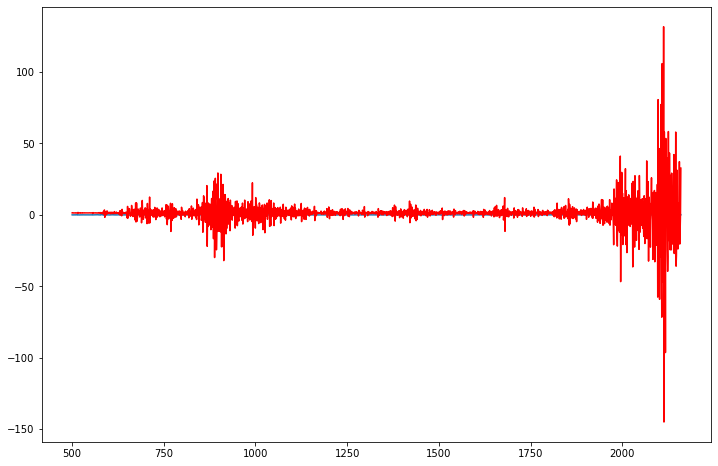

In [59]:
fig = plt.figure(figsize=(12,8))
arima_4 = ARIMA(eth.Close[500:], order=(1, 1, 2)) # using log df instead original
results_ar_4 = arima_4.fit(disp=-1)  
plt.plot(log_eth_diff)
plt.plot(results_ar_4.fittedvalues, color='red')
print(results_ar_4.summary()) # printing summary of fit parameters


# `Use auto-arima to know best aic and p & q values`

In [48]:
#check auto_arima function if we get the same p,d,q?
from pmdarima import auto_arima

stepwise_model = auto_arima(eth.Close[500:],
                            start_p=0,start_q=0,
                            max_p = 4, max_q=1,
                            d=1,
                            seasonal=False,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.aic())

17967.900038307722


In [53]:
stepwise_model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

- From above results, it is clear that 1,1,1 combination gives lowest aic

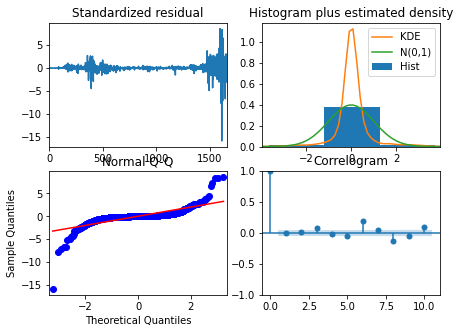

In [56]:
stepwise_model.plot_diagnostics(figsize=(7,5))
plt.show()
#residuals=stepwise_model.resid
#print(residuals.describe())

In [336]:
### Plot residual to see if it follows normal distribution or not

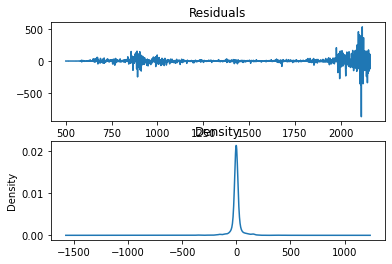

<Figure size 1440x720 with 0 Axes>

count    1659.000000
mean       -0.000349
std        54.454038
min      -872.228376
25%        -6.049566
50%        -1.203211
75%         6.676598
max       533.590942
dtype: float64


In [61]:
#results_ar_4
fig, ax = plt.subplots(2,1)
fig = plt.figure(figsize=(20,10))
residuals_112 = results_ar_4.resid

residuals_112.plot(title="Residuals", ax=ax[0])
residuals_112.plot(kind='kde', title='Density', ax=ax[1])
#residuals_112.plot_diagnostics()
plt.show()
print(residuals_112.describe())


In [58]:
#stepwise_model.plot_diagnostics(figsize=(7,5))


From above statistical results, especially mean and std, it can be said that residual error fine with near zero mean and uniform variance. 

Let'S check p-value by using Shapiro-Wilks method:

### Shapiro-Wilks if check whether our residuals follows normal distribution or not

In [597]:
from scipy import stats
shapiro_test = stats.shapiro(residuals_112)
shapiro_test

ShapiroResult(statistic=0.5602537393569946, pvalue=0.0)

Both results are satisfatory as p-value from Shapiro-Wilks is pretty close to zero. 
Let’s plot the actuals against the fitted values by means of `plot_predict()`

# `FORECASTING AND ACTUAL`

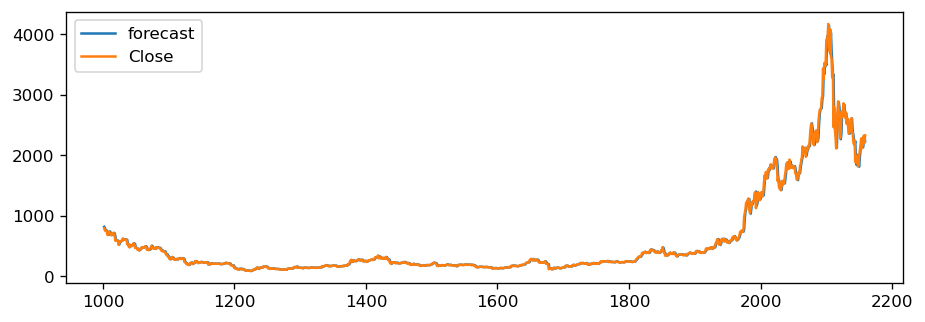

In [598]:
#actual vs forecast plot
#fig = plt.figure(figsize=(20,10))
results_ar_4.plot_predict(dynamic=False) # when dynamic=False is, in-sample lagged values are used for prediction.
plt.show()

- Its good to see our forecast follows the similar trend as actual

# `TRAIN - TEST SPLIT AND FUTURE FORECASTING`

In [73]:
# Create Training and Test
train_set_1 = eth.Close[500:2000]
test_set_1 = eth.Close[2000:]

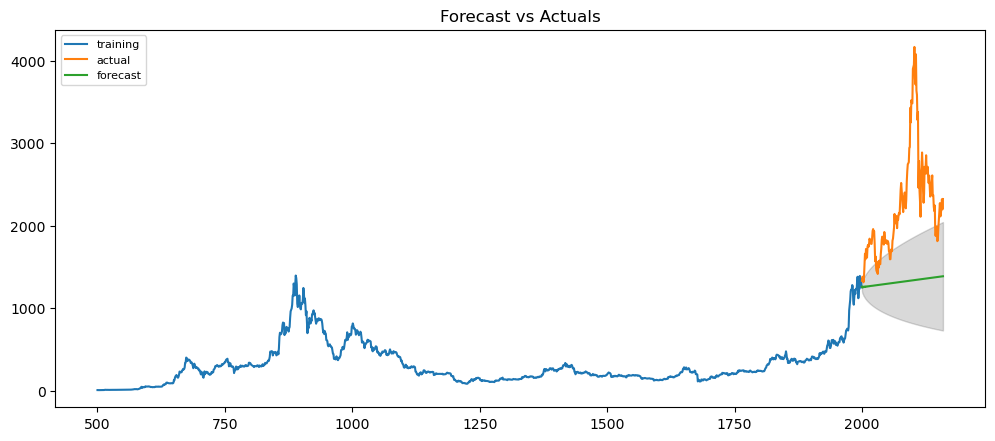

In [80]:
# Build Model
model = ARIMA(train_set_1, order=(1, 1, 2))  
tt_model = model.fit(disp=-1)  

# Forecast
fc, se, conf = tt_model.forecast(160, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_set_1.index)
lower_series = pd.Series(conf[:, 0], index=test_set_1.index)
upper_series = pd.Series(conf[:, 1], index=test_set_1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_set_1, label='training')
plt.plot(test_set_1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# `ANOTHER APPROACH TO MAKE SIGNAL STATIONARY`

# `DIFFERENCING - FIRST & SECOND ORDER`

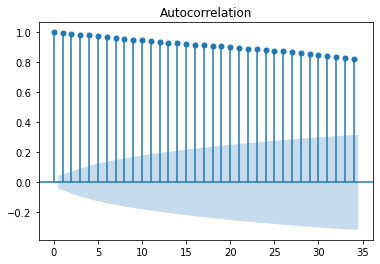

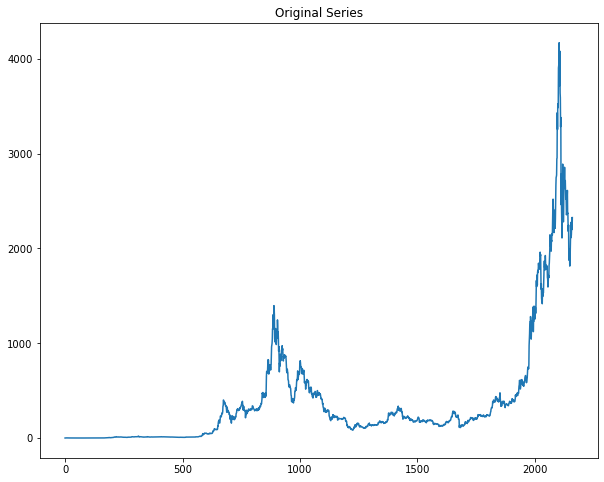

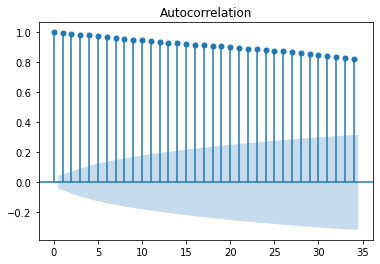

In [62]:
fig = plt.figure(figsize=(10,8))
plt.plot(eth.Close); 
plt.title('Original Series')
plot_acf(eth.Close)


In [510]:
eth.Close.diff()

0              NaN
1        -0.051428
2         0.006551
3         0.359412
4         0.149580
           ...    
2155     36.434841
2156     76.073918
2157     95.609830
2158   -123.141648
2159    126.096985
Name: Close, Length: 2160, dtype: float64

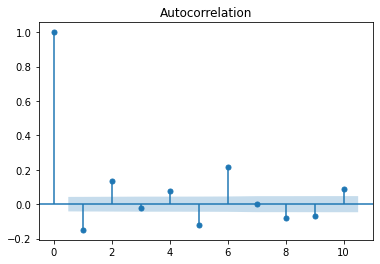

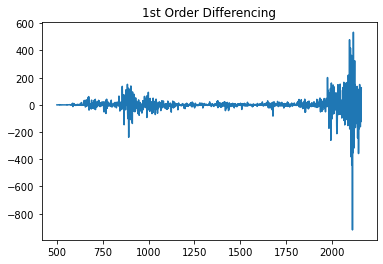

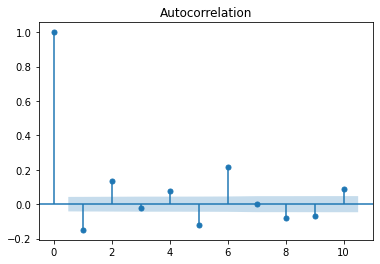

In [63]:
plt.plot(eth.Close[500:].diff()); 
plt.title('1st Order Differencing')
plot_acf(eth.Close.diff().dropna(), lags=10)

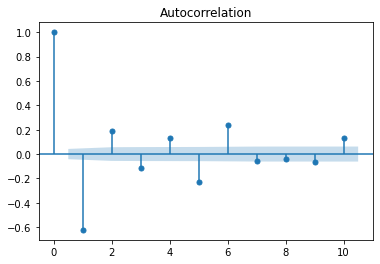

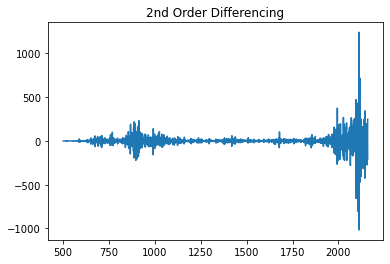

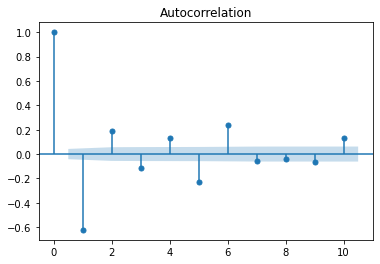

In [64]:
plt.plot(eth.Close[500:].diff().diff()); 
plt.title('2nd Order Differencing')
plot_acf(eth.Close.diff().diff().dropna(), lags=10)

- from above plots of pacf, acf , we get p =6 & q=5

# `AUTO- ARIMA TO GET BEST AIC AND p, q`

In [688]:
stepwise_model = auto_arima(eth.Close[500:],
                            start_p=0,start_q=0,
                            max_p = 6, max_q=5,
                            d=1,
                            seasonal=False,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.aic())

17967.900038307722


In [689]:
stepwise_model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Fit arima model with above order

In [75]:
# 1,1,1 ARIMA Model
model_1 = ARIMA(eth.Close, order=(1,1,1))
model_fit = model_1.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2159
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11402.718
Method:                       css-mle   S.D. of innovations             47.585
Date:                Fri, 30 Jul 2021   AIC                          22813.437
Time:                        01:15:45   BIC                          22836.146
Sample:                             1   HQIC                         22821.743
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0678      0.956      1.117      0.264      -0.806       2.942
ar.L1.D.Close    -0.8172      0.036    -22.556      0.000      -0.888      -0.746
ma.L1.D.Close     0.6966      0.044     

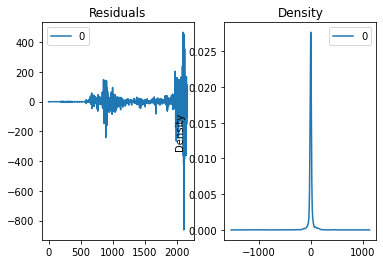

                 0
count  2159.000000
mean      0.000072
std      47.596328
min    -863.124307
25%      -3.771598
50%      -1.127227
75%       2.792459
max     465.969138


In [76]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

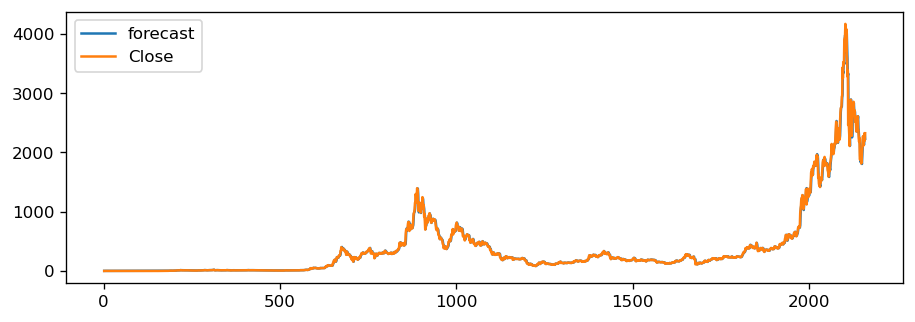

In [693]:
#Predict
model_fit.plot_predict(dynamic=False)
plt.show()

In [695]:
eth.Close[500:].shape

(1660,)

# `TRAIN - TEST SPLIT FOR SECOND APPROACH`

In [697]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = eth.Close[500:2000]
test = eth.Close[2000:]

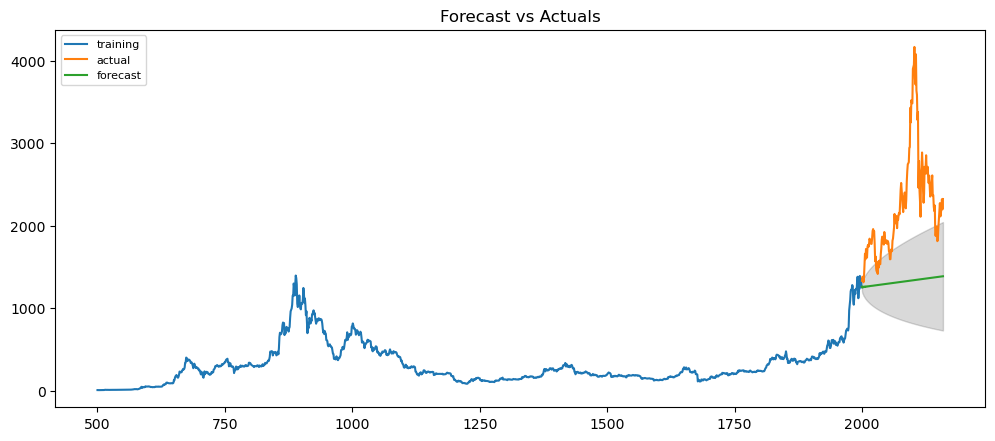

In [81]:
# Build Model
model = ARIMA(train, order=(1, 1, 2))  
tt_2 = model.fit(disp=-1)  

# Forecast
fc, se, conf = tt_2.forecast(160, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1498
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -6984.901
Method:                       css-mle   S.D. of innovations             25.570
Date:                Thu, 29 Jul 2021   AIC                          13981.802
Time:                        22:52:03   BIC                          14013.673
Sample:                             2   HQIC                         13993.676
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.002      1.125      0.261      -0.001       0.005
ar.L1.D2.Close     0.0202      0.026      0.778      0.437      -0.031       0.071
ar.L2.D2.Close     0.0022      0.026

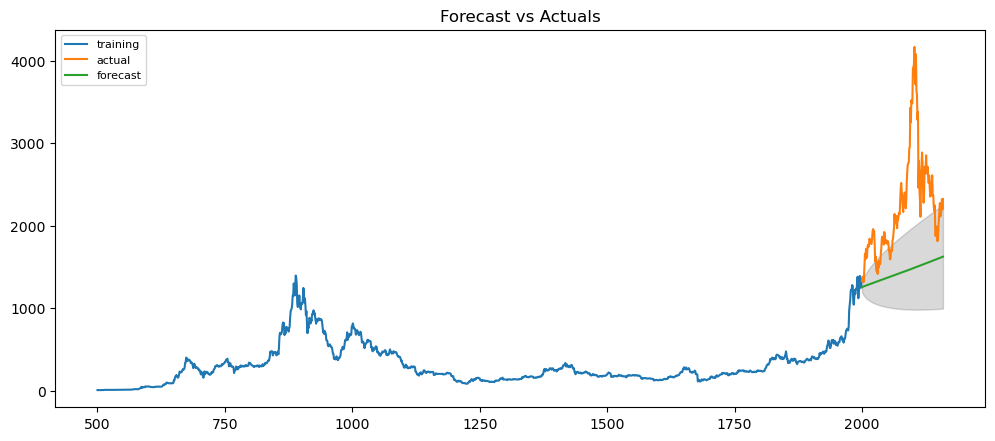

In [702]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(160, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# `CHECK ACCURACY OF FORECAST`

In [703]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.3189021974406628,
 'me': -790.6282848963776,
 'mae': 790.6282848963776,
 'mpe': -0.3189021974406628,
 'rmse': 972.7020521034096,
 'acf1': 0.9549595880044882,
 'corr': 0.5541919263414429,
 'minmax': 0.3189021974406627}

`mape is ver high and about 32%`

In [731]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_1 = pm.auto_arima(eth.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22813.437, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22900.596, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22853.469, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22863.467, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22899.655, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22826.625, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22815.427, Time=1.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22825.980, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22825.446, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22812.874, Time=2.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22809.856, Time=2.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22826.671, Time=1.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22711.856, Time=3.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22724.692, Time=7.08 sec
 ARIMA(3,1,3)(0,0,0

In [707]:
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2160
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -11348.244
Date:                Thu, 29 Jul 2021   AIC                          22710.489
Time:                        22:55:37   BIC                          22750.231
Sample:                             0   HQIC                         22725.025
                               - 2160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4501      0.014    -32.872      0.000      -0.477      -0.423
ar.L2         -0.5694      0.012    -48.849      0.000      -0.592      -0.547
ar.L3         -0.6847      0.013    -51.485      0.0

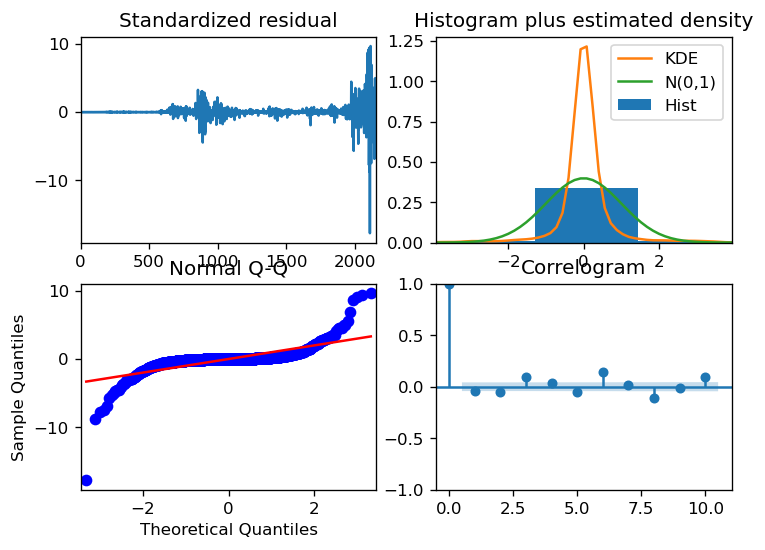

In [708]:
model_1.plot_diagnostics(figsize=(7,5))
plt.show()

# `USE again Stepwise auto-arima to get lowest aic and p,d,q order`

In [713]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(eth.Close, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=28166.312, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=23616.734, Time=5.65 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=26409.043, Time=3.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=28174.710, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=24398.276, Time=0.44 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=23371.139, Time=16.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.61 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=28094.357, Time=6.05 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=23321.112, Time=24.53 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=23575.648, Time=9.25 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.04 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.42 sec
 ARIMA(3,0,0)(2,1,0)[12] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2160
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood              -11617.804
Date:                             Thu, 29 Jul 2021   AIC                          23251.608
Time:                                     23:07:36   BIC                          23296.987
Sample:                                          0   HQIC                         23268.210
                                            - 2160                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0991      0.013     87.360      0.000       1.074       1.124
ar.L2          0.6509      0.021     31.165      0.000       0.610       0.692
ar.L3         -0.7577      0.014    -54.200      0.000      -0.785      -0.730
ma.L1         -0.2367      0.017    -13.586      0.000      -0.271      -0.203
ma.L2         -0.6254      0.018    -35.068      0.000      -0.660      -0.590
ar.S.L12      -0.7736      0.006   -135.719      0.000      -0.785      -0.762
ar.S.L24      -0.3533      0.007    -48.646      0.000      -0.368      -0.339
sigma2      2907.3404     20.068    144.871      0.000    2868.007    2946.674
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):            314278.28
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):             133.55   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

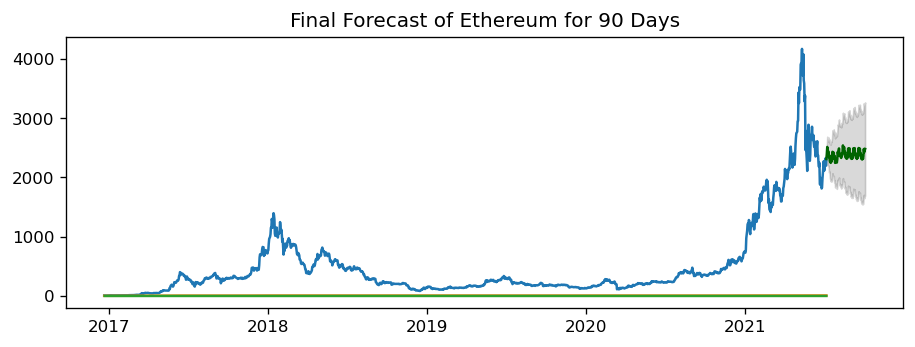

In [730]:
n_periods = 90
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Ethereum for 90 Days")
plt.show()